### Дано: 
Есть данные АА-теста с 2022-10-26 по 2022-11-01. 

Группы (колонка exp_group): 0 и 1 - контрольные группы, 2 и 3 - тестовые группы.

Предположим, что на тестовых группах развертывались 2 новых алгоритма рекомендации постов.

### Задание:
Провести симмуляцию 10 тыс АА-тестов между группами 0-3 и 1-2. α=0.05. Пользователи заранее уже разбиты на группы.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Загрузим данные из файла data for aa-test.csv и проверим количество пользователей в группах

In [7]:
df = pd.read_csv(r"C:\Users\belik\Desktop\data for aa-test.csv")

In [9]:
df.head(5)

,exp_group,user_id,likes,views,ctr
0,3,115383,11,36,0.305556
1,1,18392,8,39,0.205128
2,3,123580,15,92,0.163043
3,2,131473,26,148,0.175676
4,4,107323,5,26,0.192308


In [10]:
# проверяем количество пользователей в группах
df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
0,8484,8484,8484,8484
1,8537,8537,8537,8537
2,8480,8480,8480,8480
3,8569,8569,8569,8569
4,8515,8515,8515,8515


#### количество пользователей группах примерно одинаковое

### АА-тест между группами 0 и 3

In [12]:
# настраивоем отображение гистограммы
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [13]:
exp_group_0 = df[df.exp_group == 0]
exp_group_3 = df[df.exp_group == 3]

In [14]:
# проводим симмуляцию 10000 тестов и для каждого считаем p-value
test = pd.DataFrame()
for i in range (10000):
    samle_0 = exp_group_0.ctr.sample(500, replace=False).tolist()
    samle_3 = exp_group_3.ctr.sample(500, replace=False).tolist()
    pvalue = stats.ttest_ind(samle_0, samle_3, equal_var=False)
    test.loc[i, 'data'] = pvalue[1]

<AxesSubplot:xlabel='data', ylabel='Count'>

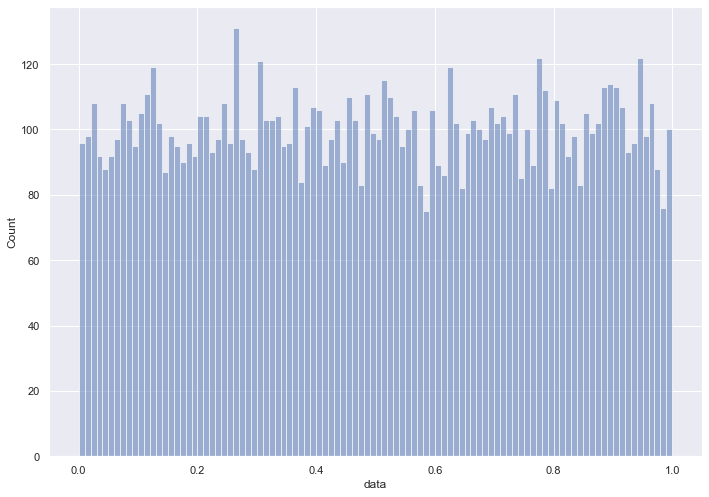

In [15]:
# строим гистограмму распределения p-value
sns.histplot(data=test,
                      x='data',
                      alpha = 0.5,
                      bins=100,
                      kde = False)

In [16]:
# считаем % p-value, которые меньше 0.05
test[test.data<= 0.05].count() / test.data.count()

data    0.0481
dtype: float64

#### Вывод:около 5 % pvalue наших 10 тыс тестов АА между группами 0 и 3 выходят за границы 5% уровня значимости. Поэтому мы можем принять, что наша система сплитования корректно работает.

### АА-тест между группами 1 и 2

In [18]:
exp_group_1 = df[df.exp_group == 1]
exp_group_2 = df[df.exp_group == 2]

In [19]:
# проводим симмуляцию 10000 тестов и для каждого считаем p-value
test_2 = pd.DataFrame()
for i in range (10000):
    samle_1 = exp_group_1.ctr.sample(500, replace=False).tolist()
    samle_2 = exp_group_2.ctr.sample(500, replace=False).tolist()
    pvalue = stats.ttest_ind(samle_1, samle_2, equal_var=False)
    test_2.loc[i, 'data_2'] = pvalue[1]

<AxesSubplot:xlabel='data_2', ylabel='Count'>

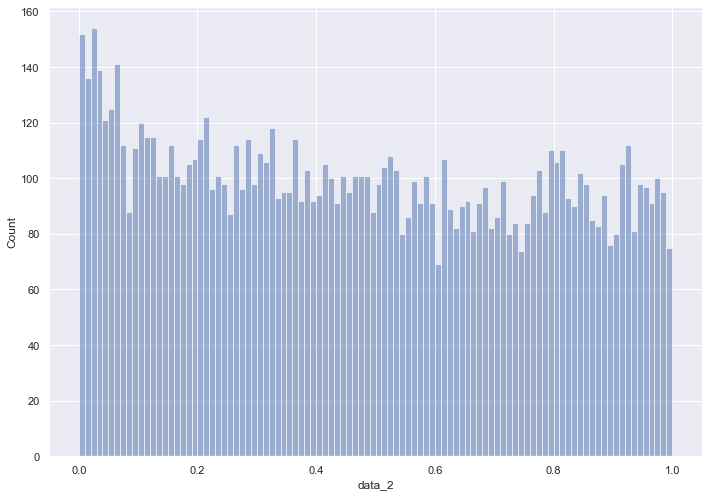

In [20]:
# строим гистограмму распределения p-value
sns.histplot(data=test_2,
                      x='data_2',
                      alpha = 0.5,
                      bins=100,
                      kde = False)

In [21]:
# считаем % p-value, которые меньше 0.05
test[test.data<= 0.05].count() / test.data.count()

data    0.0481
dtype: float64

#### Вывод: околое 5 % pvalue наших 10 тыс тестов АА между группами 1 и 2 выходят за границы 5% уровня значимости. Поэтому мы можем принять, что наша система сплитования корректно работает.